# Project Description
Cardiac disorders also known narrowly as “heart diseases” are the cause of most deaths worldwide. Heart disease has become a cause of increasing concern for this country with patients enduring several sorts of related illnesses. Death is inevitable if some of the related diseases are diagnosed too late.

In our project we will try to generate a predictive model of heart diseases which will be used for early detections.
Our focus is  


*   Finding the pre-processing techniques works best for specific models.
*   Improving the exsisting models
*   Creating combined prediction from two or more dataset





# Loading The Necessary Libraries





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Loading Dataset

Age
Sex : male : 1
female : 0

chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic

resting blood pressure (in mm Hg on admission to the hospital

serum cholestoral in mg/dl

(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

resting electrocardiographic results

-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: maximum heart rate achieved

exercise induced angina (1 = yes; 0 = no)

Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood.
It may feel like pressure or squeezing in your chest.

oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

--Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping

vessels colored by flourosopy : number of major vessels (0-3) colored by flourosopy

A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

Target : 0 No Heart disease
1 Heart disease



In [ ]:
df = pd.read_csv('UCI-Heart-Dataset.csv')

# Data visualization

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


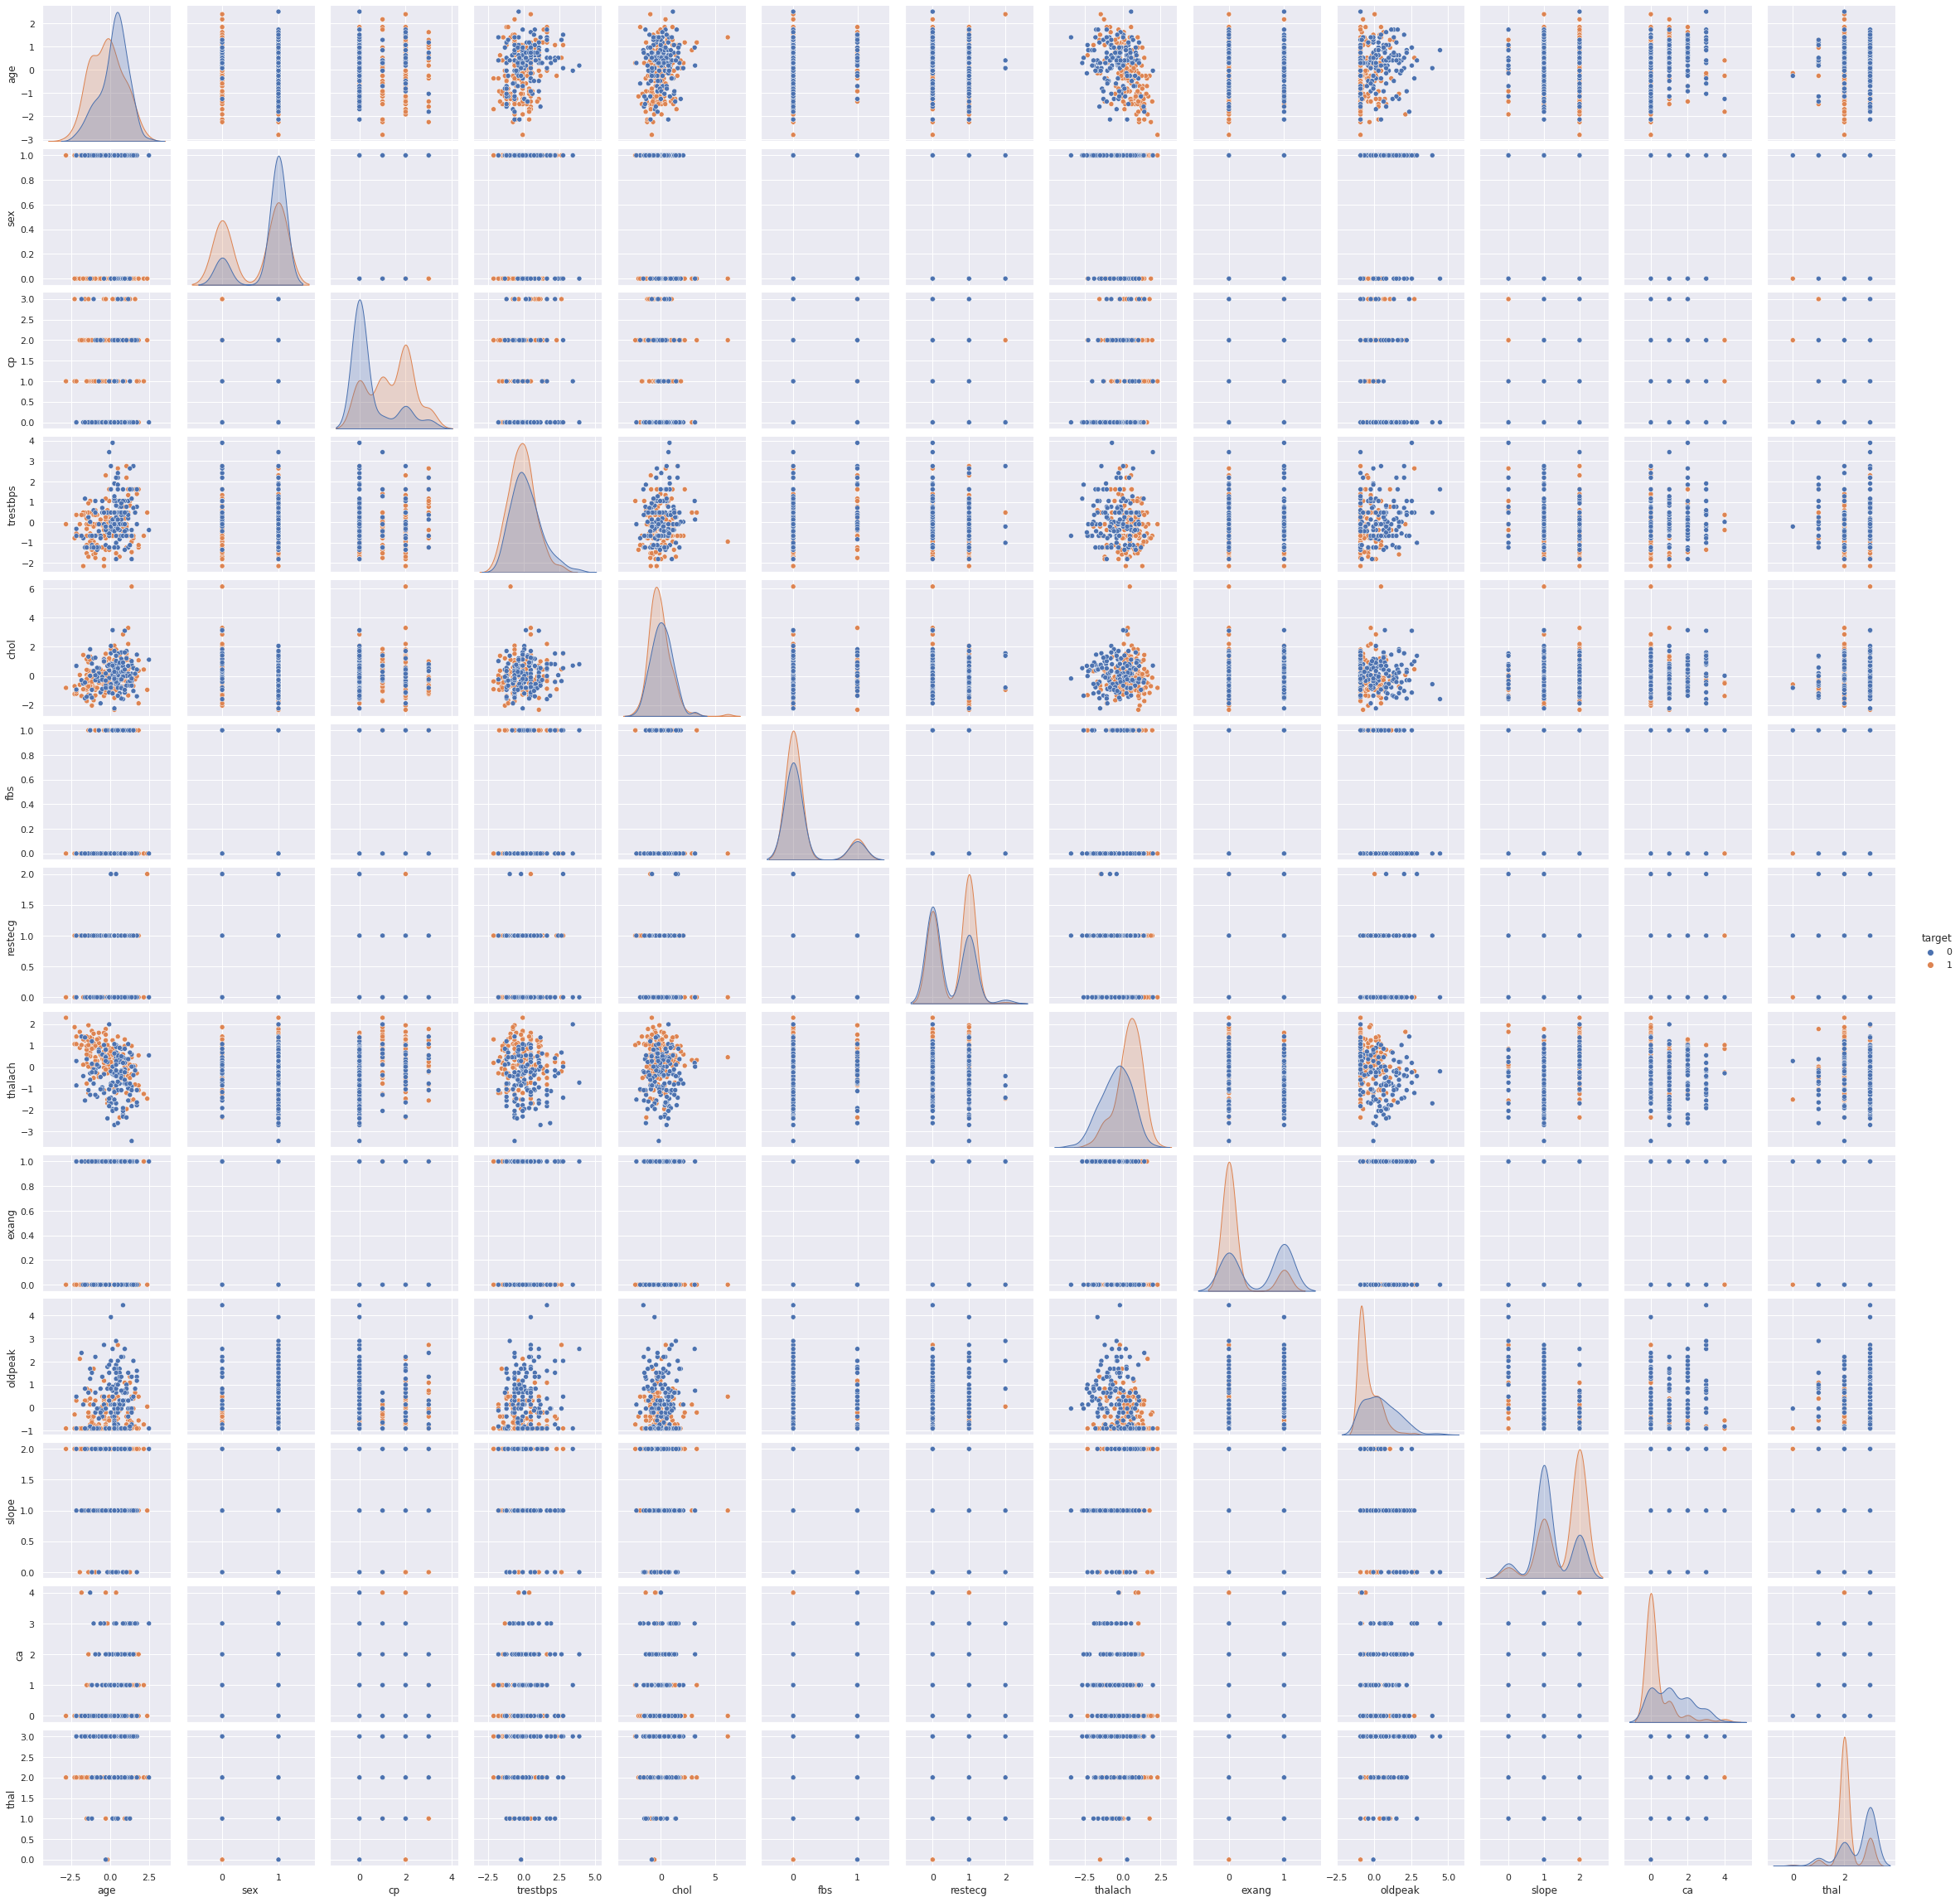

In [ ]:
sns.pairplot(df,hue = 'target')

#### Checking if there is any null value in the dataframe

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Checking For Duplicates

In [ ]:
if(df.duplicated().sum()>0):
  print("Duplicates Found.Removing Duplicate")
  df=df.drop_duplicates(keep = 'first')

Duplicates Found.Removing Duplicate


No duplicates after removing them

In [ ]:
df.duplicated().sum()

0

Dataset contains 164 Heart Disease Patients
and 138 Non Heart Disease Patients

In [ ]:
df.target.value_counts()

1    164
0    138
Name: target, dtype: int64

#### Representation in graph

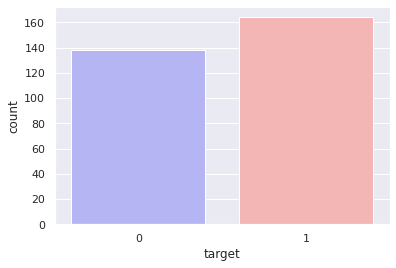

In [ ]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [ ]:
print(round(df.target.value_counts()[0]*100/sum(df.target.value_counts()),2),"% of Non-Heart Disease Patients")
print(round(df.target.value_counts()[1]*100/sum(df.target.value_counts()),2),"% of Heart Disease Patients")

45.7 % of Non-Heart Disease Patients
54.3 % of Heart Disease Patients


#### Percantage of male and female entries 

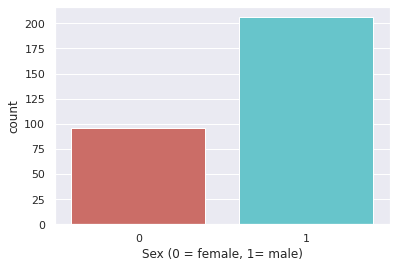

In [ ]:
sns.countplot(x='sex', data=df, palette="hls")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [ ]:
print(round(df.sex.value_counts()[0]*100/sum(df.target.value_counts()),2),"% of Female Patients")
print(round(df.sex.value_counts()[1]*100/sum(df.target.value_counts()),2),"% of Male Patients")

31.79 % of Female Patients
68.21 % of Male Patients


#### Heart Disease Frequency-Age Bar Chart

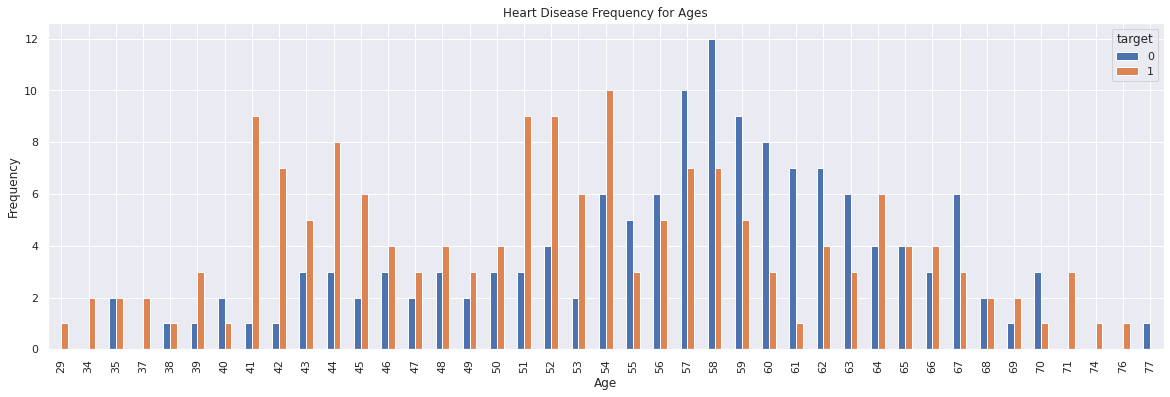

In [ ]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Calculating The Average Age of CVD Patients

In [ ]:
print("Average Age of CVD patients:", round(df.groupby('target').mean()['age'][1]))

Average Age of CVD patients: 53


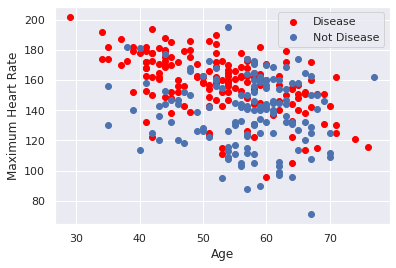

In [ ]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

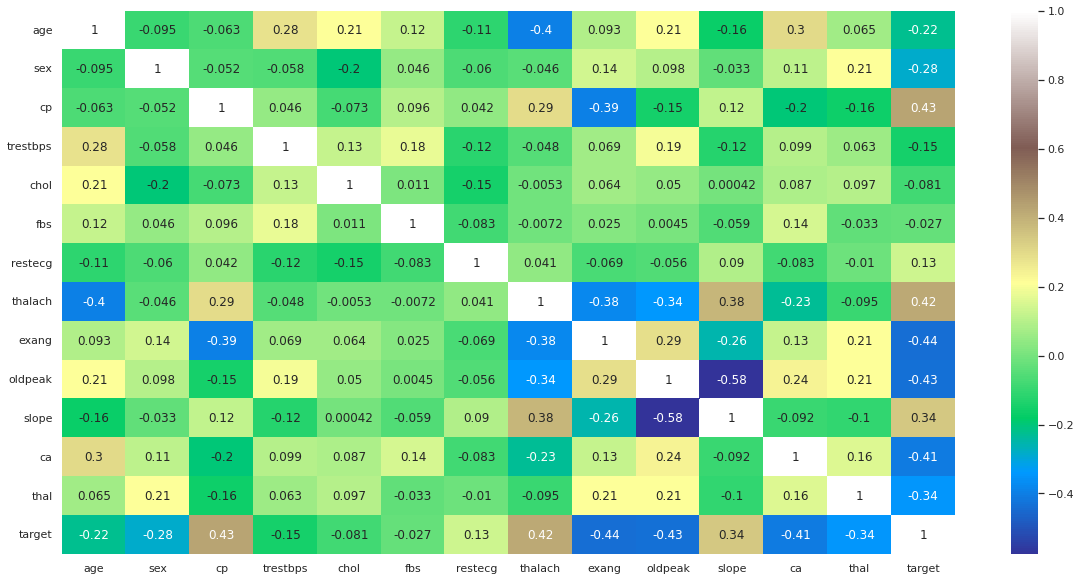

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='terrain')

#### Graphical Representation of affected Male and Female Ratio by CVD

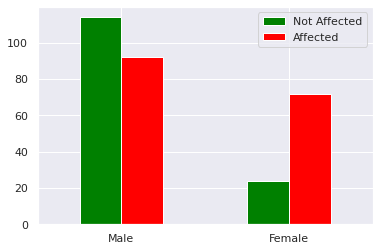

In [ ]:

Affected = [len(df[(df['sex']== 1) & (df['target']==1)]['target']),len(df[(df['sex']== 0) & (df['target']==1)]['target'])]
Not_Affected = [len(df[(df['sex']== 1) & (df['target']==0)]['target']),len(df[(df['sex']== 0) & (df['target']==0)]['target'])]
index = df['sex'].replace(0, 'Female').replace(1, 'Male').unique()
axdf = pd.DataFrame({'Not Affected': Not_Affected,
                   'Affected': Affected,}, index=index)
ax = axdf.plot.bar(rot=0,color={"Affected": "red", "Not Affected": "green"})

# Data Train-Test Split

In [ ]:
x=df.iloc[:,:-1]

In [ ]:
y=df.iloc[:,-1]

In [ ]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=40)

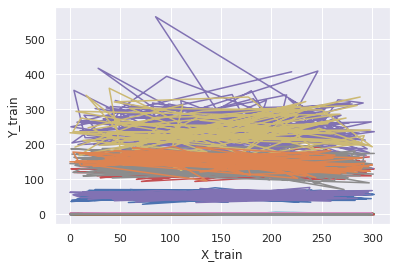

In [ ]:
plt.plot(X_train)
plt.plot(Y_train)
plt.plot(X_test)
plt.plot(Y_test)
plt.xlabel('X_train')
plt.ylabel('Y_train')
plt.show()

# Feature Engineering: Feature Selection & Model Testing 

##Feature Importance

### **Feature Selection using KBest Chi_square**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


fit_feature=SelectKBest(score_func=chi2)
fit_feature.fit(x,y)

SelectKBest(score_func=<function chi2 at 0x7f15e33e29e0>)

In [ ]:
score=pd.DataFrame(fit_feature.scores_,columns=['Score'])

In [ ]:
df_column_names=pd.DataFrame(x.columns)
feature_score=pd.concat([df_column_names,score],axis=1)
feature_score.nlargest(13,'Score')

,0,Score
7,thalach,186.180286
9,oldpeak,71.692782
11,ca,71.020719
2,cp,62.116086
8,exang,38.518849
0,age,22.210517
4,chol,21.690747
3,trestbps,15.094591
10,slope,9.677715
1,sex,7.721690


([<matplotlib.patches.Wedge at 0x7f15bf95e250>,
 [Text(1.3687325709079157, 3.002760588081542, 'thalach'),
  Text(-3.0196238890867835, 1.3311166622262716, 'oldpeak'),
  Text(-2.955453078768336, -1.4680930144915088, 'ca'),
  Text(-0.9509976664393065, -3.1600005440548578, 'cp'),
  Text(1.055442682891301, -3.126666074772171, 'exang'),
  Text(2.121920775239477, -2.5273409393287443, 'age'),
  Text(2.7183154167096006, -1.8710321470458255, 'chol'),
  Text(3.068276161650401, -1.214776273989529, 'trestbps'),
  Text(3.2169067694206768, -0.7358741990689892, 'slope'),
  Text(3.277031038922341, -0.3886741179182943, 'sex'),
  Text(3.497816848138466, -0.12360136277035909, 'thal')],
 [Text(0.7465814023134084, 1.6378694116808408, '36.4%'),
  Text(-1.647067575865518, 0.7260636339416026, '14.0%'),
  Text(-1.6120653156918194, -0.8007780079044592, '13.9%'),
  Text(-0.5187259998759852, -1.7236366603935585, '12.1%'),
  Text(0.5756960088498004, -1.705454222603002, '7.5%'),
  Text(1.1574113319488055, -1.3785496

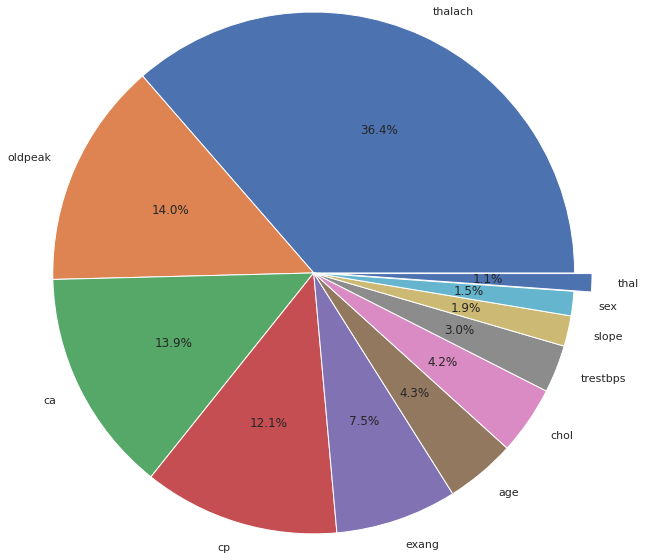

In [ ]:
import warnings
warnings.filterwarnings('ignore')
exp=[0,0,0,0,0,0,0,0,0,0,0.2]
plt.pie(feature_score.nlargest(13,'Score')['Score'][:-2],labels=feature_score.nlargest(13,'Score')[0][:-2],explode=exp,radius=3,autopct='%2.1f%%')

In [ ]:
X_train_fs_2 = X_train.drop(['thal','fbs','restecg'], axis = 1)
X_test_fs_2 = X_test.drop(['thal','fbs','restecg'], axis = 1)

### **Feature Selection using KBest f_classif**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


fit_feature=SelectKBest(score_func=f_classif)
fit_feature.fit(x,y)

SelectKBest()

In [ ]:
score=pd.DataFrame(fit_feature.scores_,columns=['Score'])

In [ ]:
df_column_names=pd.DataFrame(x.columns)
df_column_names

,0
0,age
1,sex
2,cp
3,trestbps
4,chol
5,fbs
6,restecg
7,thalach
8,exang
9,oldpeak


In [ ]:
feature_score=pd.concat([df_column_names,score],axis=1)
feature_score.nlargest(13,'Score')

,0,Score
8,exang,70.255191
2,cp,68.864299
9,oldpeak,67.721931
7,thalach,64.237793
11,ca,60.262749
10,slope,40.249626
12,thal,40.027376
1,sex,26.240952
0,age,15.474511
3,trestbps,6.558676


([<matplotlib.patches.Wedge at 0x7f15bfb8bbd0>,
 [Text(2.927200881624168, 1.5236452994771106, 'exang'),
  Text(0.4622218634431553, 3.2674685842338467, 'cp'),
  Text(-2.349988045701953, 2.3167986932528075, 'oldpeak'),
  Text(-3.275008468392171, -0.40536345661587153, 'thalach'),
  Text(-1.8555984997957702, -2.728874164844486, 'ca'),
  Text(0.2947788102457725, -3.286807790703632, 'slope'),
  Text(1.9649947457632966, -2.651187592216484, 'thal'),
  Text(2.9266580224425502, -1.524687777767193, 'sex'),
  Text(3.2372557733697565, -0.640449106318513, 'age'),
  Text(3.4964877643656482, -0.15675877532474453, 'trestbps')],
 [Text(1.596655026340455, 0.831079254260242, '15.3%'),
  Text(0.25212101642353923, 1.7822555914002796, '15.0%'),
  Text(-1.281811661291974, 1.2637083781378946, '14.7%'),
  Text(-1.7863682554866385, -0.2211073399722935, '14.0%'),
  Text(-1.0121446362522382, -1.488476817187901, '13.1%'),
  Text(0.16078844195223954, -1.7928042494747078, '8.8%'),
  Text(1.0718153158708887, -1.446102

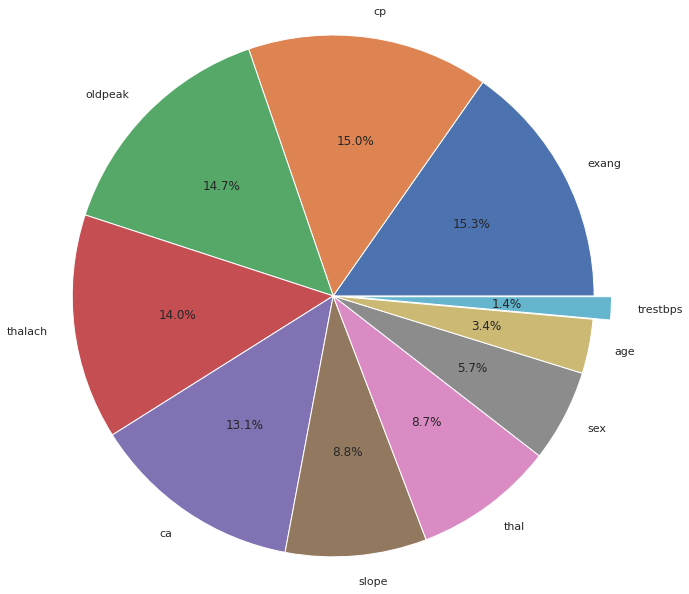

In [ ]:
import warnings
warnings.filterwarnings('ignore')
exp=[0,0,0,0,0,0,0,0,0,0.2]
plt.pie(feature_score.nlargest(13,'Score')['Score'][:-3],labels=feature_score.nlargest(13,'Score')[0][:-3],explode=exp,radius=3,autopct='%2.1f%%')

In [ ]:
X_train_fs = X_train.drop(['chol','fbs','trestbps'], axis = 1)
X_test_fs = X_test.drop(['chol','fbs','trestbps'], axis = 1)

In [ ]:
X_train_fs

,age,sex,cp,restecg,thalach,exang,oldpeak,slope,ca,thal
33,54,1,2,0,152,0,0.5,0,1,2
239,35,1,0,0,156,1,0.0,2,0,3
139,64,1,0,1,105,1,0.2,1,1,3
297,59,1,0,0,90,0,1.0,1,2,1
193,60,1,0,0,142,1,2.8,1,2,3
...,...,...,...,...,...,...,...,...,...,...
269,56,1,0,0,103,1,1.6,0,0,3
194,60,1,2,0,155,0,3.0,1,0,2
166,67,1,0,0,129,1,2.6,1,2,3
7,44,1,1,1,173,0,0.0,2,0,3


### **StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()  
scalable_columns=['age','thalach','oldpeak','trestbps','chol']
df[scalable_columns]=standardScaler.fit_transform(df[scalable_columns])

In [ ]:
x=df.iloc[:,:-1]
y= df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train_sc, X_test_sc, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [ ]:
X_train_sc

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
33,-0.046555,1,2,-0.376556,0.512893,0,0,0.106294,0,-0.468334,0,1,2
239,-2.149959,1,0,-0.319525,0.687083,0,0,0.281229,1,-0.899544,2,0,3
139,1.060500,1,0,-0.205463,0.319348,0,1,-1.949198,1,-0.727060,1,1,3
297,0.506972,1,0,1.847657,-1.364488,1,0,-2.605206,0,-0.037124,1,2,1
193,0.617678,1,0,0.764066,0.687083,0,0,-0.331045,1,1.515232,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,0.174856,1,0,-0.091401,0.706437,1,0,-2.036666,1,0.480328,0,0,3
194,0.617678,1,2,0.478910,-1.190298,0,0,0.237495,0,1.687716,1,0,2
166,1.392616,1,0,-0.661712,-0.338703,0,0,-0.899585,1,1.342748,1,2,3
7,-1.153610,1,1,-0.661712,0.319348,0,1,1.024705,0,-0.899544,2,0,3


## **One Hot Encoding**

In [ ]:
X_label_enc = pd.get_dummies(df, columns=['sex', 'cp','fbs','restecg','exang','slope','ca','thal'])
X_label_enc=X_label_enc.drop(['target'], axis=1)
X_label_enc.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.949794,0.764066,-0.261285,0.018826,1.084022,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train_enc, X_test_enc, Y_train, Y_test = train_test_split(X_label_enc, y, test_size=0.3, random_state=40)

## **Function For Getting Performance Metrices**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

def getClassificationResult(model,x_test,y_test):
    y_true=y_test
    y_pred=model.predict(x_test)
    
    if len(y_pred.shape) == 2:
        y_pred=np.argmax(y_pred, axis=1)
    if len(y_true.shape) == 2:
        y_true=np.argmax(y_true, axis=1)
    ac=round(accuracy_score(y_true, y_pred),4)
    pr=round(precision_score(y_true, y_pred,average='weighted'),4)
    re=round(recall_score(y_true, y_pred,average='weighted'),4)
    f1=round(f1_score(y_true, y_pred,average='weighted'),4)
    #print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)
    return ac,pr,re,f1

## **Boosting**

#### XGB Classifier

In [ ]:
import xgboost
import matplotlib.pyplot as plt

model = xgboost.XGBClassifier()
model.fit(x,y)

XGBClassifier()

In [ ]:
print(model.feature_importances_) 

[0.0452967  0.0582311  0.1987215  0.02975759 0.03289822 0.03209292
 0.03474128 0.03619151 0.08743005 0.08011569 0.0585154  0.11920868
 0.18679939]


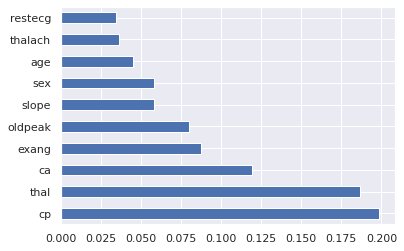

<Figure size 576x432 with 0 Axes>

In [ ]:
# plot the graph of feature importances for better visualization 

feat_imp = pd.Series(model.feature_importances_, index=x.columns)
feat_imp.nlargest(10).plot(kind='barh')

plt.figure(figsize=(8,6))
plt.show()

# **Machine Learning Model**

### **LogisticRegression**

With All Feature

In [ ]:
from sklearn.linear_model import LogisticRegression


model1=LogisticRegression(random_state=0,max_iter=1000).fit(X_train,Y_train)

In [ ]:
model1.score(X_test,Y_test)

0.8791208791208791

In [ ]:
ac,pr,re,f1 = getClassificationResult(model1,X_test,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.8791  Precision= 0.8823  Recall= 0.8791  F1 Score=  0.8779


With Selected Feature

In [ ]:
from sklearn.linear_model import LogisticRegression


model1=LogisticRegression(random_state=0,max_iter=1000).fit(X_train_fs,Y_train)

In [ ]:
model1.score(X_test_fs,Y_test)

0.9010989010989011

In [ ]:
ac,pr,re,f1 = getClassificationResult(model1,X_test_fs,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.9011  Precision= 0.9048  Recall= 0.9011  F1 Score=  0.9001


With Feature Scaling

In [ ]:
from sklearn.linear_model import LogisticRegression


model1=LogisticRegression(random_state=0,max_iter=1000).fit(X_train_sc,Y_train)

In [ ]:
model1.score(X_test_sc,Y_test)

0.8791208791208791

In [ ]:
ac,pr,re,f1 = getClassificationResult(model1,X_test_sc,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.8791  Precision= 0.8823  Recall= 0.8791  F1 Score=  0.8779


With One Hot Encoding

In [ ]:
from sklearn.linear_model import LogisticRegression


model1=LogisticRegression(random_state=0,max_iter=5000).fit(X_train_enc,Y_train)


In [ ]:
model1.score(X_test_enc,Y_test)

0.9010989010989011

In [ ]:
ac,pr,re,f1 = getClassificationResult(model1,X_test_enc,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.9011  Precision= 0.901  Recall= 0.9011  F1 Score=  0.901


### **Gradient Boosting Classifier**

#### With All Feature

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=150,learning_rate=0.01)
gbc.fit(X_train,Y_train)
gbc.score(X_test,Y_test)
ac,pr,re,f1 = getClassificationResult(gbc,X_test,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.8681  Precision= 0.8681  Recall= 0.8681  F1 Score=  0.8677


#### With Selected Feature

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=150,learning_rate=0.01)
gbc.fit(X_train_fs,Y_train)
gbc.score(X_test_fs,Y_test)
ac,pr,re,f1 = getClassificationResult(gbc,X_test_fs,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.8571  Precision= 0.8569  Recall= 0.8571  F1 Score=  0.8569


In [ ]:
#Chi_square
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=150,learning_rate=0.01)
gbc.fit(X_train_fs_2,Y_train)
gbc.score(X_test_fs_2,Y_test)
ac,pr,re,f1 = getClassificationResult(gbc,X_test_fs_2,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.8242  Precision= 0.8257  Recall= 0.8242  F1 Score=  0.8246


#### With Feature Scaling

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=150,learning_rate=0.01)
gbc.fit(X_train_sc,Y_train)
gbc.score(X_test_sc,Y_test)
ac,pr,re,f1 = getClassificationResult(gbc,X_test_sc,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.8681  Precision= 0.8681  Recall= 0.8681  F1 Score=  0.8677


With One Hot Encoding

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=150,learning_rate=0.1)
gbc.fit(X_train_enc,Y_train)
gbc.score(X_test_enc,Y_test)
ac,pr,re,f1 = getClassificationResult(gbc,X_test_enc,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.8242  Precision= 0.8239  Recall= 0.8242  F1 Score=  0.8236


### **Random Forest Classifier**

With All Feature

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier()
Rfc.fit(X_train,Y_train)
Rfc.score(X_test,Y_test)

0.8571428571428571

In [ ]:
ac,pr,re,f1 = getClassificationResult(Rfc,X_test,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.8571  Precision= 0.8577  Recall= 0.8571  F1 Score=  0.8573


 With Selected Feature

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier()
Rfc.fit(X_train_fs,Y_train)
Rfc.score(X_test_fs,Y_test)

0.8351648351648352

In [ ]:
ac,pr,re,f1 = getClassificationResult(Rfc,X_test_fs,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.8352  Precision= 0.8414  Recall= 0.8352  F1 Score=  0.8358


 With Feature Scaling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier()
Rfc.fit(X_train_sc,Y_train)
Rfc.score(X_test_sc,Y_test)

0.8571428571428571

In [ ]:
ac,pr,re,f1 = getClassificationResult(Rfc,X_test_sc,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.8571  Precision= 0.8576  Recall= 0.8571  F1 Score=  0.8564


With One Hot Encoding

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier()
Rfc.fit(X_train_enc,Y_train)
Rfc.score(X_test_enc,Y_test)

0.8571428571428571

In [ ]:
ac,pr,re,f1 = getClassificationResult(Rfc,X_test_enc,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.8571  Precision= 0.8598  Recall= 0.8571  F1 Score=  0.8576


### **Support Vector Machine(SVM)**

#### With All Feature

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train,Y_train)
classifier.score(X_test,Y_test)
ac,pr,re,f1 = getClassificationResult(classifier,X_test,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.8681  Precision= 0.8696  Recall= 0.8681  F1 Score=  0.8671


#### With Selected Feature

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_fs,Y_train)
classifier.score(X_test_fs,Y_test)
ac,pr,re,f1 = getClassificationResult(classifier,X_test_fs,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.8791  Precision= 0.8823  Recall= 0.8791  F1 Score=  0.8779


In [ ]:
#Chi_square
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_fs_2,Y_train)
classifier.score(X_test_fs_2,Y_test)
ac,pr,re,f1 = getClassificationResult(classifier,X_test_fs_2,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.8681  Precision= 0.8696  Recall= 0.8681  F1 Score=  0.8671


#### With Feature Scaling

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_sc,Y_train)
classifier.score(X_test_sc,Y_test)
ac,pr,re,f1 = getClassificationResult(classifier,X_test_sc,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.8791  Precision= 0.8798  Recall= 0.8791  F1 Score=  0.8785


With One Hot Encoding

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_enc,Y_train)
classifier.score(X_test_enc,Y_test)
ac,pr,re,f1 = getClassificationResult(classifier,X_test_enc,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.8681  Precision= 0.8696  Recall= 0.8681  F1 Score=  0.8671


### **K-Nearest Neighbour(KNN)**




#### With All Feature

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train,Y_train)
classifier.score(X_test,Y_test)
ac,pr,re,f1 = getClassificationResult(classifier,X_test,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.6813  Precision= 0.6805  Recall= 0.6813  F1 Score=  0.6808


#### With Selected Feature

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_fs,Y_train)
classifier.score(X_test_fs,Y_test)
ac,pr,re,f1 = getClassificationResult(classifier,X_test_fs,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.6813  Precision= 0.6805  Recall= 0.6813  F1 Score=  0.6808


In [ ]:
#Chi_square
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_fs_2,Y_train)
classifier.score(X_test_fs_2,Y_test)
ac,pr,re,f1 = getClassificationResult(classifier,X_test_fs_2,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.6813  Precision= 0.6805  Recall= 0.6813  F1 Score=  0.6808


#### With Feature Scaling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_sc,Y_train)
classifier.score(X_test_sc,Y_test)
ac,pr,re,f1 = getClassificationResult(classifier,X_test_sc,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.8462  Precision= 0.846  Recall= 0.8462  F1 Score=  0.8457


With One Hot Encoding

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_enc,Y_train)
classifier.score(X_test_enc,Y_test)
ac,pr,re,f1 = getClassificationResult(classifier,X_test_enc,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.8462  Precision= 0.8462  Recall= 0.8462  F1 Score=  0.8462


### **Perceptron**

With All Feature

In [ ]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron(tol=1e-3, random_state=0)
perceptron.fit(X_train,Y_train)
perceptron.score(X_test,Y_test)

0.6703296703296703

In [ ]:
ac,pr,re,f1 = getClassificationResult(perceptron,X_test,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.6703  Precision= 0.6997  Recall= 0.6703  F1 Score=  0.6687


With Selected Feature

In [ ]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron(tol=1e-3, random_state=0)
perceptron.fit(X_train_fs,Y_train)
perceptron.score(X_test_fs,Y_test)

0.5714285714285714

In [ ]:
ac,pr,re,f1 = getClassificationResult(perceptron,X_test_fs,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.5714  Precision= 0.7571  Recall= 0.5714  F1 Score=  0.4269


With Feature Scaling

In [ ]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron(tol=1e-3, random_state=0)
perceptron.fit(X_train_sc,Y_train)
perceptron.score(X_test_sc,Y_test)

0.7692307692307693

In [ ]:
ac,pr,re,f1 = getClassificationResult(perceptron,X_test_sc,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.7692  Precision= 0.8205  Recall= 0.7692  F1 Score=  0.7664


With One Hot Encoding

In [ ]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron(tol=1e-3, random_state=0)
perceptron.fit(X_train_enc,Y_train)
perceptron.score(X_test_enc,Y_test)

0.8351648351648352

In [ ]:
ac,pr,re,f1 = getClassificationResult(perceptron,X_test_enc,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.8352  Precision= 0.8358  Recall= 0.8352  F1 Score=  0.8354


### **LDA - PCA**

In [ ]:
from sklearn.decomposition import PCA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

colors = ['royalblue','red','deeppink', 'maroon', 'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [ ]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit(x,y).transform(x)

In [ ]:
lda.explained_variance_ratio_

array([1.])

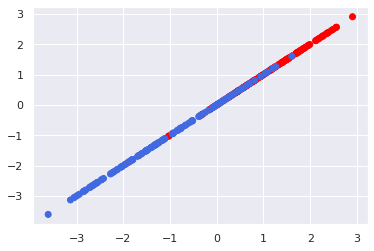

In [ ]:
plt.scatter(X_lda[:,0],X_lda[:,0],c=vectorizer(y))

In [ ]:
pca = PCA()
X_pca = pca.fit(x).transform(x)

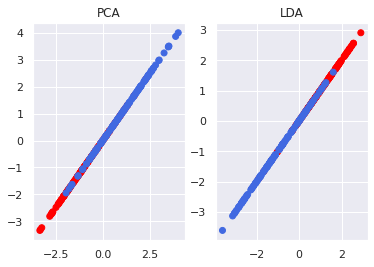

In [ ]:
from pylab import *
subplot(1,2,1)
title("PCA")
plt.scatter(X_pca[:,0],X_pca[:,0],c=vectorizer(y))
subplot(1,2,2)
title("LDA")
plt.scatter(X_lda[:,0],X_lda[:,0],c=vectorizer(y))

In [ ]:
X_train_lda, X_test_lda, Y_train_lda, Y_test_lda = train_test_split(x, y)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [ ]:
y_pred = lda.predict(X_test)
print(accuracy_score(Y_test, y_pred))

0.8901098901098901


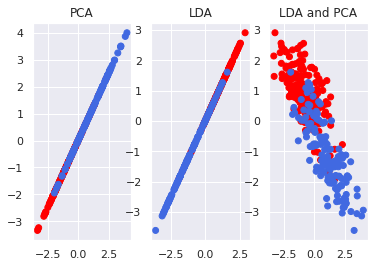

In [ ]:
from pylab import *
subplot(1,3,1)
title("PCA")
plt.scatter(X_pca[:,0],X_pca[:,0],c=vectorizer(y))
subplot(1,3,2)
title("LDA")
plt.scatter(X_lda[:,0],X_lda[:,0],c=vectorizer(y))
subplot(1,3,3)
title("LDA and PCA")
plt.scatter(X_pca[:,0],X_lda[:,0],c=vectorizer(y))

In [ ]:
X_lda.shape


(302, 1)

### **DecisionTree classifier**

With All Feature

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Dtc = DecisionTreeClassifier()
Dtc.fit(X_train,Y_train)
Dtc.score(X_test,Y_test)

0.7377049180327869

With Selected Feature

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Dtc = DecisionTreeClassifier()
Dtc.fit(X_train_fs,Y_train)
Dtc.score(X_test_fs,Y_test)

0.7912087912087912

With Feature Scaling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Dtc = DecisionTreeClassifier()
Dtc.fit(X_train_sc,Y_train)
Dtc.score(X_test_sc,Y_test)

0.6813186813186813

With One Hot Encoding

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Dtc = DecisionTreeClassifier()
Dtc.fit(X_train_enc,Y_train)
Dtc.score(X_test_enc,Y_test)

0.7802197802197802

# Auto ML

### **EvalMl**

In [ ]:
!pip install evalml

In [ ]:
import evalml


In [ ]:
X_train,X_test,Y_train,Y_test=evalml.preprocessing.split_data(x,y,problem_type='binary')

In [ ]:
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>]

In [ ]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
269,0.174856,1,0,-0.091401,0.706437,1,0,-2.036666,1,0.480328,0,0,3
191,0.396267,1,0,-0.205463,-0.590310,0,0,-0.812118,1,0.997780,1,3,3
15,-0.489377,0,2,-0.661712,-0.532247,0,1,0.368697,0,0.480328,1,0,2
224,-0.046555,1,0,-1.232023,-0.145158,0,1,-1.030787,1,1.515232,1,1,3
250,-0.378671,1,0,0.478910,0.996754,0,1,-1.205722,1,2.722620,1,3,3


In [ ]:
from evalml import AutoMLSearch

In [ ]:
automl = AutoMLSearch(X_train = X_train,y_train = Y_train, problem_type='binary',max_batches=1,optimize_thresholds=True)

In [ ]:
automl.search()

	High coefficient of variation (cv >= 0.5) within cross validation scores.
	Decision Tree Classifier w/ Label Encoder + Imputer may not perform as estimated on unseen data.


In [ ]:
automl.rankings

,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,8,Extra Trees Classifier w/ Label Encoder + Imputer,8,0.445260,0.046493,0.445260,97.175561,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,6,Random Forest Classifier w/ Label Encoder + Im...,6,0.452268,0.053479,0.452268,97.131104,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,4,LightGBM Classifier w/ Label Encoder + Imputer,4,0.480390,0.073650,0.480390,96.952714,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,3,XGBoost Classifier w/ Label Encoder + Imputer,3,0.542393,0.084144,0.542393,96.559412,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,1,Elastic Net Classifier w/ Label Encoder + Impu...,1,0.568082,0.194947,0.568082,96.396455,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,2,Logistic Regression Classifier w/ Label Encode...,2,0.569834,0.195776,0.569834,96.385345,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,5,CatBoost Classifier w/ Label Encoder + Imputer,5,0.650070,0.006006,0.650070,95.876379,False,"{'Label Encoder': {'positive_label': None}, 'I..."
7,7,Decision Tree Classifier w/ Label Encoder + Im...,7,8.274008,1.426659,8.274008,47.515054,True,"{'Label Encoder': {'positive_label': None}, 'I..."
8,0,Mode Baseline Binary Classification Pipeline,0,15.764535,0.216136,15.764535,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [ ]:
automl.best_pipeline

pipeline = BinaryClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Imputer': ['Imputer', 'X', 'Label Encoder.y'], 'Extra Trees Classifier': ['Extra Trees Classifier', 'Imputer.x', 'Label Encoder.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Extra Trees Classifier':{'n_estimators': 100, 'max_features': 'auto', 'max_depth': 6, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_jobs': -1}}, random_seed=0)

In [ ]:
best_pipeline = automl.best_pipeline

In [ ]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


*****************************************************
* Extra Trees Classifier w/ Label Encoder + Imputer *
*****************************************************

Problem Type: binary
Model Family: Extra Trees

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
3. Extra Trees Classifier
	 * n_estimators : 100
	 * max_features : auto
	 * max_depth : 6
	 * min_samples_split : 2
	 * min_weight_fraction_leaf : 0.0
	 * n_jobs : -1

Training
Training for binary problems.
Total training time (including CV): 1.8 seconds

Cross Validation
----------------
             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.489       0.488 0.697 0.848      0.653 0.744                     0.739            0.728        160           81
1      

In [ ]:
scores = best_pipeline.score(X_test, Y_test,  objectives=evalml.objectives.get_core_objectives('binary'))
print(f'Accuracy Binary: {scores["Accuracy Binary"]}')

Accuracy Binary: 0.8360655737704918


# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


tuned_parameters = {'C': [0.1, 0.5, 1, 5, 10, 50, 100],'solver':['lbfgs','newton-cg','sag','saga'],'penalty':['l1', 'l2', 'elasticnet', 'none']}
clf = GridSearchCV(LogisticRegression(solver='liblinear'), tuned_parameters, cv=3, scoring="accuracy")
clf.fit(X_train_sc, Y_train)

print(f'Model Score: {clf.score(X_test_sc, Y_test)}')
clf.best_params_


Model Score: 0.9120879120879121


{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [ ]:
ac,pr,re,f1 = getClassificationResult(clf,X_test_sc,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.9121  Precision= 0.9144  Recall= 0.9121  F1 Score=  0.9114


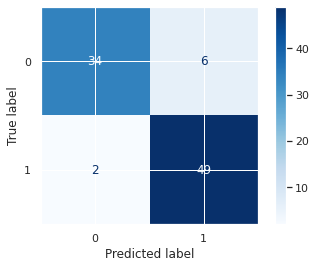

In [ ]:
predict = clf.predict(X_test_sc)
confusion_matrix(Y_test,predict)
disp = plot_confusion_matrix(clf,X_test_sc,Y_test,cmap='Blues',values_format='.3g')

# **Comparison**

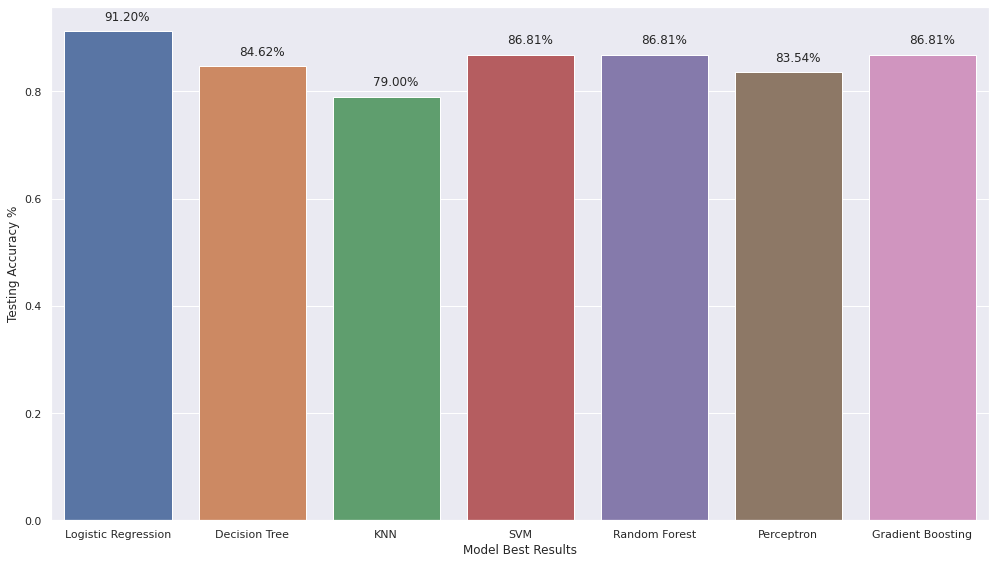

In [ ]:
methods = ["Logistic Regression","Decision Tree", "KNN", "SVM", "Random Forest","Perceptron","Gradient Boosting"]
best_accuracy = [.9120, .8462, .79, .8681, .8681,.8354,.8681]

sns.set()
plt.figure(figsize=(14,8))
plt.ylabel("Testing Accuracy %")
plt.xlabel("Model Best Results")
sns.barplot(x=methods, y=best_accuracy, palette="deep")

for idx, method in enumerate(methods):
    plt.text(idx -0.1, best_accuracy[idx]+0.02, "{:.2f}%".format(best_accuracy[idx]*100))
    
plt.tight_layout()